# Домашнее задание №4. Логистическая регрессия. Оптимизация. Подбор гиперараметров

## Ф.И.О: Лукин Денис Владимирович

По вопросам в задании писать в беседу курса или в лс (tg: @Skorik_S)

## Задание 1: Теоретическая часть

Постановка задачи логистической регрессии:
$$
    \mathcal{L}(\theta, X, y) = \dfrac{1}{N}\sum_{i=1}^N\log(1 + e^{-y_i\langle\theta, x_i\rangle}) → \min_{θ \in \mathbb{R}^d}, \tag{1}
$$

в которой


1.   $θ \in \mathbb{R}^d$ - вектор параметров модели.
2.   $(x_i, y_i)$ - обучающая пара. В данной постановке $y = \{-1, 1\}$.



### Задача 0 (0.5 балла)

1. *Получите постановку логистической регрессии, используя принцип максимума правдоподобия в предположении $y = \{0, 1\}$.*
2. Проверьте, что если метки классов $y = \{-1, 1\}$, то полученная постановка примет вид (1).
---

### 1. Если $y = \{0, 1\}$

Рассмотрим сигмоидную функцию $\sigma(z) = \frac{1}{1+e^{-z}}$.

Вероятность того, что $y_i=1$:
    $$
    P(y_i=1 | x_i, \theta) = \sigma(\langle \theta, x_i \rangle)
    $$
Вероятность того, что $y_i=0$, равна:
    $$
    P(y_i=0 | x_i, \theta) = 1 - \sigma(\langle \theta, x_i \rangle)
    $$

То есть:

$$
P(y_i | x_i, \theta) = [\sigma(\langle \theta, x_i \rangle)]^{y_i} \cdot [1 - \sigma(\langle \theta, x_i \rangle)]^{1-y_i}
$$

Запишем максимум правдоподобия, то есть произведение вероятностей для каждого объекта:

$$
\mathcal{L}(\theta) = \prod_{i=1}^{N} P(y_i | x_i, \theta) = \prod_{i=1}^{N} [\sigma(\langle \theta, x_i \rangle)]^{y_i} \cdot [1 - \sigma(\langle \theta, x_i \rangle)]^{1-y_i}
$$

Переходим к логарифму правдоподобия:
$$
\log \mathcal{L}(\theta) = \sum_{i=1}^{N} \log \left( [\sigma_i]^{y_i} \cdot [1 - \sigma_i]^{1-y_i} \right)
$$

$$
\log \mathcal{L}(\theta) = \sum_{i=1}^{N} \left[ y_i \log(\sigma_i) + (1 - y_i) \log(1 - \sigma_i) \right]
$$

Максимизация логарифма правдоподобия эквивалентна минимизации отрицательного логарифма правдоподобия.

То есть получаем искомую функцию потерь — бинарную кросс-энтропию:

$$
\mathcal{L}(\theta) = -\dfrac{1}{N} \log \mathcal{L}(\theta) = -\dfrac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\sigma_i) + (1 - y_i) \log(1 - \sigma_i) \right] \to \min_{\theta \in \mathbb{R}^d}
$$


### 2. Если $y = \{-1, 1\}$

В этом случае общую формулу для вероятности можно записать так:

$P(y_i | x_i, \theta) = \sigma(y_i \langle \theta, x_i \rangle)$

Снова минимизируем отрицательный логарифм правдоподобия:

$$
\mathcal{L}(\theta) = -\dfrac{1}{N} \sum_{i=1}^{N} \log(\sigma(y_i \langle \theta, x_i \rangle))
$$

$$
\mathcal{L}(\theta, X, y) = \dfrac{1}{N}\sum_{i=1}^N\log(1 + e^{-y_i\langle\theta, x_i\rangle}) \to \min_{\theta \in \mathbb{R}^d}, \tag{1}
$$

### Задача 1* (2 балла)

1. Покажите, что градиент функции потерь равен:

$$\nabla \mathcal{L}(\theta, X, y) = - \dfrac{1}{N}\sum_{i=1}^N \dfrac{y_i x_{i}e^{-y_i\langle\theta, x_i\rangle}}{1 + e^{-y_i\langle\theta, x_i\rangle}}. $$

2. Покажите, что гессиан функции потерь равен:

$$ \nabla^2 \mathcal{L}(\theta, X, y) = \dfrac{1}{N}X^\top D X, \tag{2}$$
где $D$ - диагональная матрица с элементами $\sigma(-y_i\langle\theta, x_i\rangle)(1 - \sigma(-y_i\langle\theta, x_i\rangle))$, где $\sigma(\cdot)$ - функция сигмоиды

---

#### Ваше решение:*

### 1. Градиент функции потерь

Функция потерь для одного объекта:
$$
\mathcal{L}_i(\theta) = \log(1 + e^{-y_i\langle\theta, x_i\rangle})
$$
Для нахождения градиента, дифференцируем $\mathcal{L}_i$ по каждому компоненту $\theta_j$ вектора $\theta$:
$$
\frac{\partial \mathcal{L}_i}{\partial \theta_j} = \frac{1}{1 + e^{-y_i\langle\theta, x_i\rangle}} \cdot e^{-y_i\langle\theta, x_i\rangle} \cdot (-y_i x_{ij})
$$
Заметим, что $\frac{e^{-z}}{1+e^{-z}}$ ровно то же самое, что и $\sigma(-z)$.
То есть:
$$
\nabla_{\theta} \mathcal{L}_i = -y_i x_i \cdot \sigma(-y_i\langle\theta, x_i\rangle)
$$
Усредняя по всем объектам, получаем итоговый градиент:
$$
\nabla \mathcal{L}(\theta, X, y) = -\frac{1}{N} \sum_{i=1}^N y_i x_i \cdot \sigma(-y_i\langle\theta, x_i\rangle)
$$


### 2. Гессиан функции потерь

Найдём $\frac{\partial^2 \mathcal{L}_i}{\partial \theta_k \partial \theta_j}$ путём дифференцирования по $\theta_k$.

Знаем, что производная сигмоиды $\sigma'(z) = \sigma(z)(1-\sigma(z))$.
Тогда можем записать:
$$
\frac{\partial}{\partial \theta_k} \left( -y_i x_{ij} \sigma(-y_i\langle\theta, x_i\rangle) \right) = -y_i x_{ij} \cdot \sigma'(-y_i\langle\theta, x_i\rangle) \cdot (-y_i x_{ik})
$$
$$
= x_{ij} x_{ik} \cdot \sigma(-y_i\langle\theta, x_i\rangle)(1 - \sigma(-y_i\langle\theta, x_i\rangle))
$$
Обозначим $d_i = \sigma(-y_i\langle\theta, x_i\rangle)(1 - \sigma(-y_i\langle\theta, x_i\rangle))$. Тогда гессиан для одного объекта — это матрица $d_i \cdot x_i x_i^T$.

Запишем полный гессиан:
$$
\nabla^2 \mathcal{L} = \frac{1}{N} \sum_{i=1}^N d_i x_i x_i^T
$$
Представим его в матричном виде, где $X$ — матрица признаков, а $D$ — диагональная матрица с элементами $d_i$:
$$
\nabla^2 \mathcal{L}(\theta, X, y) = \frac{1}{N} X^T D X
$$


### Задача 2* (1 балл)

1. Покажите что в выражении (2) $\nabla^2\mathcal{L} \succeq 0$. Что это говорит об $\mathcal{L}$ и её экстремумах?

2. В каких случаях в выражении (2) $\nabla^2\mathcal{L} \succ 0$? Что в этом случае мы можем сказать о глобальном минимуме? Всегда ли он существует? Ответ обоснуйте.

---

#### Ваше решение:*

### 1. Докажем, что гессиан функции потерь положительно полуопределен

$$
\nabla^2 \mathcal{L} = \frac{1}{N} X^T D X
$$

Чтобы доказать, что гессиан положительно полуопределен, нужно показать, что для любого ненулевого вектора $z$ выполнено: $z^T (\nabla^2 \mathcal{L}) z \ge 0$.

$$
z^T (\nabla^2 \mathcal{L}) z = \frac{1}{N} z^T (X^T D X) z = \frac{1}{N} (Xz)^T D (Xz)
$$

Пусть $w = Xz$:
$$
\frac{1}{N} w^T D w = \frac{1}{N} \sum_{i=1}^N d_i w_i^2 = \frac{1}{N} \sum_{i=1}^N \underbrace{d_i}_{>0} \underbrace{(\langle x_i, z \rangle)^2}_{\ge 0} \ge 0
$$

То есть функция потерь $\mathcal{L}$ выпуклая. А это значит, что любой локальный минимум функции потерь $\mathcal{L}$ является глобальным.

### 2. $\nabla^2 \mathcal{L} \succ 0$

Функция строго выпукла, если $z^T (\nabla^2 \mathcal{L}) z > 0$ для всех ненулевых $z. Это выполнено, если выражение под суммой обращается в ноль. А это выолнено только при $z=0$. То есть система уравнений $Xz=0$ имеет только тривиальное решение, то есть столбцов матрицы X линейно независимы.

Получаем, что при линейной независимости признаков функция потерь $\mathcal{L}$ строго выпукла, и если у нее есть глобальный минимум, то он единственен.

Но глобальный минимум существует не всегда. Он не существует, если данные можно разделить линией(мб плоскостью).
Если такая разделяющая линия существует, она задается некоторым вектором весов $\theta^*$.
Алгоритм логистической регрессии пытается не просто разделить классы, а приблизить вероятности к 0 и 1.
Чтобы сделать предсказания увереннее, алгоритм может просто умножить вектор $\theta^*$ на большую константу $c \to \infty$. По факту это не меняет положение разделяющей линии, но делает ее размер больше, а скалярное произведение $\langle c\theta^*, x_i \rangle$ устремляется к $\pm\infty$.
В результате функция потерь $\mathcal{L}$ будет стремиться к нулю, но никогда его не достигнет, потому что для этого норма вектора $\theta$ должна стать бесконечной. То есть такой процесс не сойдется.


Регуляризируем исходную задачу:
$$
\mathcal{L}(\theta, X, y) = -\dfrac{1}{N}\sum_{i=1}^N\log(1 + e^{-y_i\langle\theta, x_i\rangle}) + \dfrac{\lambda}{2}\|\theta\|^2 → \min_{θ \in \mathbb{R}^d}, \tag{3}
$$
здесь $\lambda > 0$ - параметр регуляризации. Задача (3) представляет собой *минимизацию эмпирического риска*.

### Задача 3 (2 балла)

1. Покажите, что задача (3) L-гладкая с константой $$L = \dfrac{1}{4N}\lambda_{max}(XX^\top) + \lambda \tag{4}.$$

2. Покажите, что задача (3) $\mu$-сильно-выпуклая с константой $\mu = λ$.

Для доказательства п.1 и п.2 воспользуйтесь тем, что $L = \lambda_{max}(\nabla^2 \mathcal{L}(\theta, X, y))$ и $\mu = \lambda_{min}(\nabla^2 \mathcal{L}(\theta, X, y))$, где $\lambda_{max}(\cdot)$ и $\lambda_{min}(\cdot)$ - максимальное и минимальное собственное значение матрицы.

---

#### Ваше решение:

### 1. L-гладкость

Функция является L-гладкой, если максимальное собственное значение ее гессиана ограничено сверху: $\lambda_{max}(\nabla^2 \mathcal{L}) \le L$, так как максимальная кривизна функции в любой точке и в любом направлении определяется ее максимальным по модулю собственным значением гессиана.

Гессиан регуляризованной функции потерь:
$$
\nabla^2 \mathcal{L}(\theta) = \frac{1}{N} X^T D X + \lambda I
$$

Максимальное собственное значение:
    $$
    \lambda_{max}(\nabla^2 \mathcal{L}) = \lambda_{max}\left(\frac{1}{N} X^T D X\right) + \lambda
    $$

Функция $z(1-z)$ достигает максимума в $1/4$. Поэтому $D_{ii} \le 1/4$.

Так как $D \preceq \frac{1}{4}I_N$:
$$
\frac{1}{N} X^T D X \preceq \frac{1}{4N} X^T X
$$
Отсюда следует, что $\lambda_{max}\left(\frac{1}{N} X^T D X\right) \le \frac{1}{4N}\lambda_{max}(X^T X)$.


Так как $\lambda_{max}(X^T X) = \lambda_{max}(XX^T)$, получаем такую оценку:
$$
\lambda_{max}(\nabla^2 \mathcal{L}) \le \frac{1}{4N}\lambda_{max}(XX^T) + \lambda
$$
Получилось, функция является L-гладкой с константой $L = \frac{1}{4N}\lambda_{max}(XX^T) + \lambda$.


### 2. μ-сильная выпуклость

Функция является μ-сильно выпуклой, если минимальное собственное значение ее гессиана ограничено снизу: $\lambda_{min}(\nabla^2 \mathcal{L}) \ge \mu$.

минимальное собственное значение аналогично L-гладкости:
    $$
    \lambda_{min}(\nabla^2 \mathcal{L}) = \lambda_{min}\left(\frac{1}{N} X^T D X\right) + \lambda
    $$

Знаем, что матрица $\frac{1}{N} X^T D X$ является положительно полуопределенной. Это означает, что все ее собственные значения неотрицательны:
$$
\lambda_{min}\left(\frac{1}{N} X^T D X\right) \ge 0
$$

$$
\lambda_{min}(\nabla^2 \mathcal{L}) \ge 0 + \lambda = \lambda
$$
То есть функция является μ-сильно выпуклой с константой $\mu = \lambda$. 


### Задача 4* (1 балл)

1. Всегда ли существует глобальный минимум задачи (3)? Ответ обоснуйте.

---

#### Ваше решение:*

Да, глобальный минимум существует всегда.

В этой ситуации модель может бесконечно увеличивать норму вектора весов, чтобы минимизировать ошибку до нуля.
Добавление L2 регуляризации не позволяет весам $\theta$ убежать на бесконечность, штрафую их за слишком большие значения, то есть тянет из вниз. Это гарантирует, что где-то обязательно найдется точка глобального минимума.


## Задание 2: Сравнение алгоритмов оптимизации

Для практической части мы пользуемся библиотекой `numpy`: [документация](https://numpy.org/doc/)

Не пользуйтесь другими библиотеками (`torch`, `jax` и тп)

In [1]:
from typing import Callable
import time
from functools import partial
from tqdm import tqdm
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import requests

Подготовим данные

In [2]:
url = 'https://drive.google.com/uc?id=1vcd064Gz1Apf9Tz-VkSSkchwPZopBh98'
filename = 'mushrooms.txt'

response = requests.get(url)
with open(filename, 'wb') as file:
    file.write(response.content)

In [3]:
data = load_svmlight_file(filename)
mushrooms_x, mushrooms_y = data[0].toarray(), data[1]
# сделаем y -1 или 1
mushrooms_y = 2 * mushrooms_y - 3

Разделим данные на train/test

**Важно:** не меняйте код ниже. random_state зафиксирован для воспроизводимости.

In [4]:
train_mush_x, test_mush_x, train_mush_y, test_mush_y = train_test_split(
    mushrooms_x, mushrooms_y, test_size=0.2, random_state=42
)

print(f"{train_mush_x.shape=}")
print(f"{train_mush_y.shape=}")

train_mush_x.shape=(6499, 112)
train_mush_y.shape=(6499,)


### Задача 0 (1 балл)

Найдите константу гладкости $L$ согласно (4) на практике для `train_mush_x`.

---

In [5]:
def get_lipschitz(x_values: np.ndarray) -> float:
    N = x_values.shape[0]
    lambda_max = np.max(np.linalg.eigvalsh(x_values @ x_values.T))
    L = 1 / (4 * N) * lambda_max * 1000 / 999
    return L

In [6]:
def assert_lipschitz(get_lipschitz: Callable) -> None:
    true_lipschitz = 2.5872260889612666
    your_lipschitz = get_lipschitz(train_mush_x)
    assert np.allclose(true_lipschitz, your_lipschitz, atol=1e-6), "Failed on get_lipschitz(train_mush_x)"
    print("Success!!!")

assert_lipschitz(get_lipschitz)

Success!!!


In [7]:
lipschitz_mush = get_lipschitz(train_mush_x)
lambda_mush = lipschitz_mush / 1000

### Задача 1 (2 балла)

Реализуйте подсчёт значения, градиента и гессиана целевой функции (3).

In [8]:
def mush_exp(x: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
    # TODO: Calculate exp(-y * <w,x>)
    return np.exp(-y * (x @ w))


def sigmoida(z):
    return 1 / (1 + np.exp(-z))


def mush_f(
    w: np.ndarray, x: np.ndarray = train_mush_x, y: np.ndarray = train_mush_y
) -> float:
    # TODO: Calculate loss function
    N = x.shape[0]
    loss_without_reg = (1 / N) * np.sum(np.log(1 + mush_exp(x, y, w)))
    reg = (lambda_mush / 2) * np.linalg.norm(w) ** 2
    return loss_without_reg + reg


def mush_grad(
    w: np.ndarray, x: np.ndarray = train_mush_x, y: np.ndarray = train_mush_y
) -> np.ndarray:
    # TODO: Calculate gradient of loss function
    N = x.shape[0]
    return (1 / N) * (x.T @ (-y * sigmoida(-y * (x @ w)))) + lambda_mush * w


def mush_hess(
    w: np.ndarray, x: np.ndarray = train_mush_x, y: np.ndarray = train_mush_y
) -> np.ndarray:
    # TODO: Calculate hessian of loss function
    N = x.shape[0]
    diag_elems = sigmoida(-y * (x @ w)) * (1 - sigmoida(-y * (x @ w)))
    D = np.diag(diag_elems)
    hess_without_reg = (1 / N) * (x.T @ D @ x)
    reg = lambda_mush * np.eye(x.shape[1])
    return hess_without_reg + reg


def mush_accuracy(
    w: np.ndarray, x: np.ndarray = test_mush_x, y: np.ndarray = test_mush_y
) -> float:
    if len(x) == 0:
        return 0
    return np.mean((np.sign(x @ w) == y))

In [9]:
def assert_mush(mush_f: Callable, mush_grad: Callable, mush_hess: Callable):
    w = np.zeros(train_mush_x[0].shape[0])
    assert np.allclose(mush_f(w), 0.6931471805599453, atol=1e-6), "Failed on mush_f(w) for w=0"
    assert np.allclose(mush_grad(w).sum(), -0.3732112632712724, atol=1e-6), "Failed on mush_grad(w) for w=0"
    assert np.allclose(mush_hess(w).sum(), 110.53976932196366, atol=1e-6), "Failed on mush_hess(w) for w=0"

    w = np.ones(train_mush_x[0].shape[0])
    assert np.allclose(mush_f(w), 10.271673398468815, atol=1e-6), "Failed on mush_f(w) for w=1"
    assert np.allclose(mush_grad(w).sum(), 10.416558042769106, atol=1e-6), "Failed on mush_grad(w) for w=1"
    assert np.allclose(mush_hess(w).sum(), 0.2897696563545762, atol=1e-6), "Failed on mush_hess(w) for w=1"
    print("Success!!!")

assert_mush(mush_f, mush_grad, mush_hess)

Success!!!


### Задача 2 (2 балла)

Рассмотрим и реализуем метод градиентного спуска (Gradient Descent)

$$
\begin{equation*}
w_{k+1} = w_k - \gamma_k \nabla \mathcal{L}(w_k)
\end{equation*}
$$

In [10]:
# Фиксируем рандомизацию для воспроизводимости
seed = 42
np.random.seed(seed)
start_w_mush = np.random.randn(train_mush_x.shape[1])

In [11]:
# Базовый класс оптимизатора
class ManualSolver:
    def __init__(
        self,
        lr: float | Callable, # Скорость обучения
        name: str, # Название оптимизатора (для логгирования)
        first_order: bool, # Использует ли оптимизатор grad_f
        second_order: bool, # Использует ли оптимизатор hess_f
    ) -> None:
        super().__init__()
        self.name = name
        self.lr = lr if isinstance(lr, Callable) else lambda _: lr
        self.first_order = first_order
        self.second_order = second_order

    def step(self, w: np.ndarray, k: int, grad_f: np.ndarray, hess_f: np.ndarray) -> np.ndarray:
        # эту функцию должны переопределить наследуемые классы
        raise NotImplementedError

#### Задача 2.1

Реализуйте шаг обучения и тестирования.

**Важно:** критерием сходимости является отношение $\frac{\| \nabla f(w^k) \|}{\| \nabla f(w^0) \|}$ на **обучающей** выборке. В связи с этим, подсчет `grad_norm`$=\| \nabla f(w^k) \|$ необходимо производить на обучающей выборке `train_mush_x`.

Подсчет точности и лосса в `eval_optimizer_step` проводятся на тестовой выборке.

In [48]:
def train_optimizer_step(
    optimizer: ManualSolver,
    w: np.ndarray,
    iter_num: int,
    x: np.ndarray = train_mush_x,
    y: np.ndarray = train_mush_y
) -> np.ndarray:
    # TODO: implement train_step pipeline;
    # OUTPUT: Updated training weights
	grad_f = None
	hess_f = None
	if isinstance(optimizer, NAG):
		if optimizer.first_order:
			grad_f = mush_grad(optimizer.y_prev, x, y)
	else:
		if optimizer.first_order:
			grad_f = mush_grad(w, x, y)
	if optimizer.second_order:
		hess_f = mush_hess(w, x, y)
	updated_w = optimizer.step(w, iter_num, grad_f, hess_f)
	return updated_w

In [24]:
def eval_optimizer_step(
    w: np.ndarray,
    x: np.ndarray = test_mush_x,
    y: np.ndarray = test_mush_y
) -> list[float, float, float]:
    # TODO: implement eval pipeline;
    # OUTPUT: [grad_norm, accuracy, val_loss]
    # You need to calculate `grad_norm` on train_mush_x!!
    global train_mush_x, train_mush_y

    grad_norm = np.linalg.norm(mush_grad(w, train_mush_x, train_mush_y), ord=2)
    accuracy = mush_accuracy(w, x, y)
    val_loss = mush_f(w, x, y)

    return [grad_norm, accuracy, val_loss]

In [25]:
def test_optimizer(
    optimizer: ManualSolver,
    max_iters: int = 1000,
    start_w: np.ndarray = start_w_mush,
    stop_criterion: float = 1e-8,
) -> dict:

    accuracies = []
    losses = []
    criterion_logs = []  # нормы градиента или что-то другое
    time_logs = []

    w = start_w.copy()

    # initial eval
    start_grad_norm, accuracy, val_loss = eval_optimizer_step(w)
    time_logs.append(0)
    criterion_logs.append(start_grad_norm / start_grad_norm)
    accuracies.append(accuracy)
    losses.append(val_loss)

    start_time = time.time()

    with tqdm(range(max_iters), desc=optimizer.name) as loop:
        for k in loop:
            # train
            w = train_optimizer_step(optimizer, w, k)
            # eval
            grad_norm, accuracy, val_loss = eval_optimizer_step(w)
            criterion_logs.append(grad_norm / start_grad_norm)
            accuracies.append(accuracy)
            losses.append(val_loss)
            time_logs.append(time.time() - start_time)
            loop.set_postfix(
                {"Loss": val_loss, "Accuracy": accuracy, "Grad norm": grad_norm / start_grad_norm}
            )
            # Остановить, если criterion <= stop_criterion
            if grad_norm / start_grad_norm <= stop_criterion:
                break

    results_dict = {
        "name": optimizer.name,
        "num_iters": list(range(len(accuracies))),
        "Time": time_logs,
        "Accuracy": accuracies,
        "Criterion": criterion_logs,
        "Loss": losses,
        "W": w.copy(),
    }

    return results_dict

In [26]:
def plot_results(results_dictionaries: list, title: str, metrics_type: list = ['Criterion'], x: str = 'num_iters') -> None:
    valid_metrics = {'Criterion', 'Accuracy', 'Loss'}
    assert all(metric in valid_metrics for metric in metrics_type), \
        f"All metrics should be one of {valid_metrics}, got {metrics_type}"

    assert x in ['num_iters', 'Time'], f"x should be one of ['num_iters', 'Time'], got {x}"

    num_metrics = len(metrics_type)
    if num_metrics == 1:
        width = 10
    else:
        width = 6 * num_metrics
    fig, axs = plt.subplots(1, num_metrics, figsize=(width, 6), sharey=False)
    if num_metrics == 1:
        axs = [axs]

    for idx, metric_type in enumerate(metrics_type):
        ax = axs[idx]
        for results_dict in results_dictionaries:
            if metric_type == 'Criterion':
                ax.set_yscale('log')
            ax.plot(
                results_dict[x],
                results_dict[metric_type],
                label=results_dict["name"],
                linewidth=2
            )
        ylabel = f"log {metric_type}" if metric_type == 'Criterion' else metric_type
        ax.set_xlabel(x, fontsize=14)
        ax.set_ylabel(ylabel, fontsize=14)
        ax.legend(loc='best', fontsize=12)
        ax.grid(True)

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

#### Задача 2.2

- Реализуйте метод шаг градиентного спуска
- Проведите оптимизацию гиперпараметров . Сравнения проиллюстрируйте на графике. Критерием задачи является $\frac{\| \nabla f(w^k) \|}{\| \nabla f(w^0) \|}$. Однако приветствуются также графики точности и функции потерь на тесте:
1.  Протестируйте различные $\gamma_k = \gamma = \frac{s}{L}$, где $s \in [0, 3]$, $L$ -- константа липшица в задаче. Рассмотрите не менее 4-х $s$;
2. Протестируйте различные $\gamma_k = \frac{\gamma}{\delta + k}$, где $\gamma, \delta \in [1, 100]$. Рассмотрите не менее 4-х гиперпараметров;
3. Протестируйте различные $\gamma_k = \frac{\gamma}{\delta + \sqrt{k}}$, где $\gamma, \delta \in [1, 100]$. Рассмотрите не менее 4-х гиперпараметров;
4. Выберите лучшие $\gamma^1_k$, $\gamma^2_k$, $\gamma^3_k$ из п. 1-3 соответственно. Сделайте общий график, сравнивающий их. Также добавьте базовый $\gamma_k = \gamma = 10^{-3}$.

In [27]:
class GradientDescent(ManualSolver):
    def __init__(self, lr, name) -> None:
        super().__init__(lr, name, True, False)
    def step(self, w: np.ndarray, k: int, grad_f: np.ndarray, hess_f: None) -> np.ndarray:
        # TODO: init GradientDescent step
        curr_lr = self.lr(k)
        w_new = w - curr_lr * grad_f
        return w_new

GD lr=1e-3: 100%|██████████| 1000/1000 [00:05<00:00, 172.24it/s, Loss=1.12, Accuracy=0.66, Grad norm=0.47] 


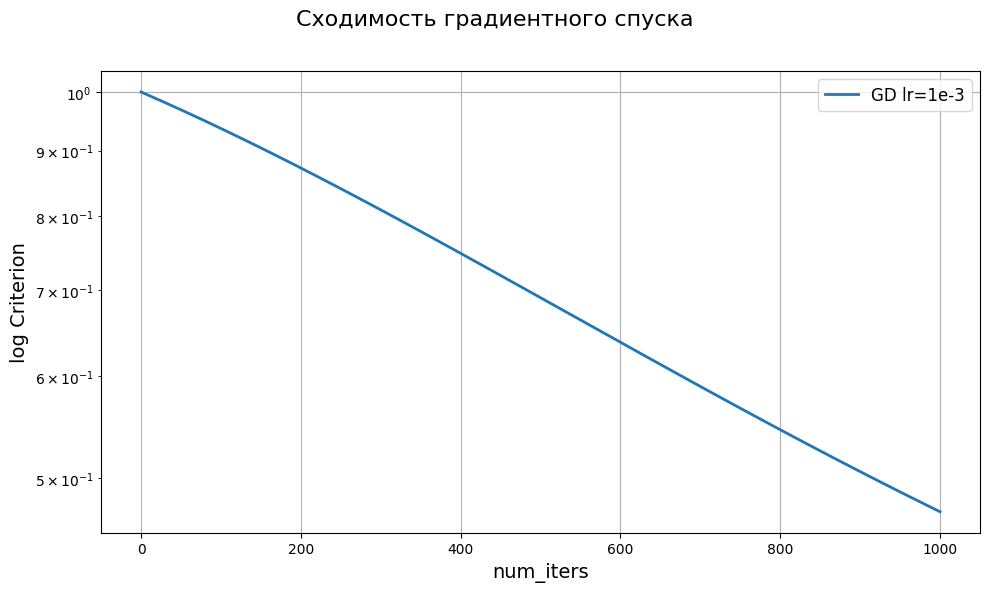

In [28]:
grad_opt = GradientDescent(lr=1e-3, name='GD lr=1e-3')
gd_res_baseline = test_optimizer(grad_opt)
plot_results([gd_res_baseline], 'Cходимость градиентного спуска')

GD lr=3.0: 100%|██████████| 1000/1000 [00:05<00:00, 179.01it/s, Loss=0.084, Accuracy=0.996, Grad norm=0.00136]


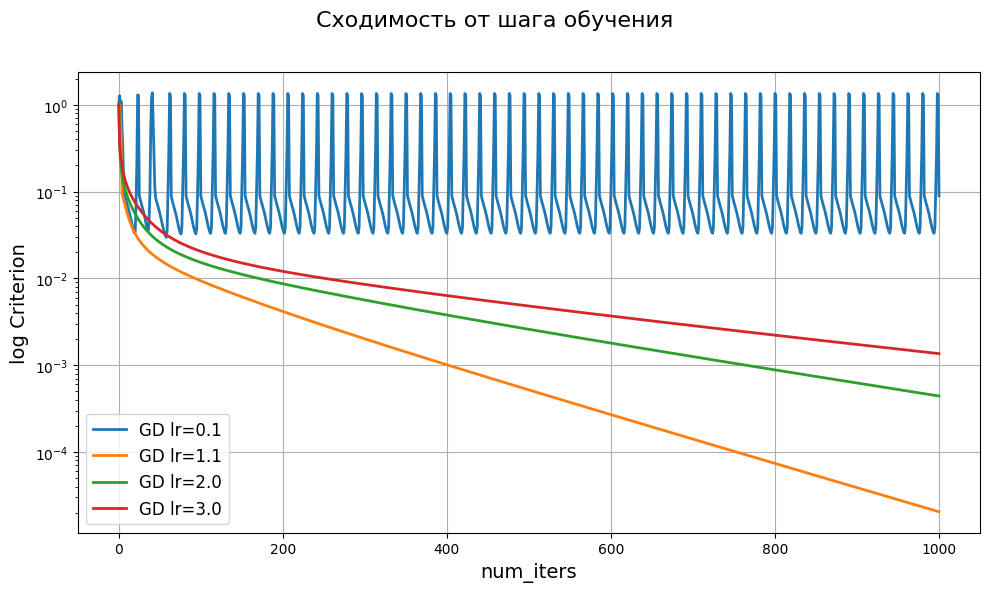

In [34]:
s_grid = np.linspace(0.1 , 3, 4)
L = get_lipschitz(train_mush_x)

res_list = []
for s in s_grid:
	optimizer = GradientDescent(lr=L / s, name=f'GD lr={s:.1f}')
	res = test_optimizer(optimizer)
	res_list.append(res)

plot_results(res_list, "Сходимость от шага обучения")

best_1 = min(res_list, key=lambda res: res['Criterion'][-1])

GD γ=33.4, δ=0.1:   0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\User\AppData\Local\Temp\ipykernel_15096\3433282958.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\User\AppData\Local\Temp\ipykernel_15096\3433282958.py:3: RuntimeWarning: overflow encountered in exp
  return np.exp(-y * (x @ w))
GD γ=100.0, δ=100.0: 100%|██████████| 1000/1000 [00:07<00:00, 140.04it/s, Loss=0.106, Accuracy=0.992, Grad norm=0.00914]


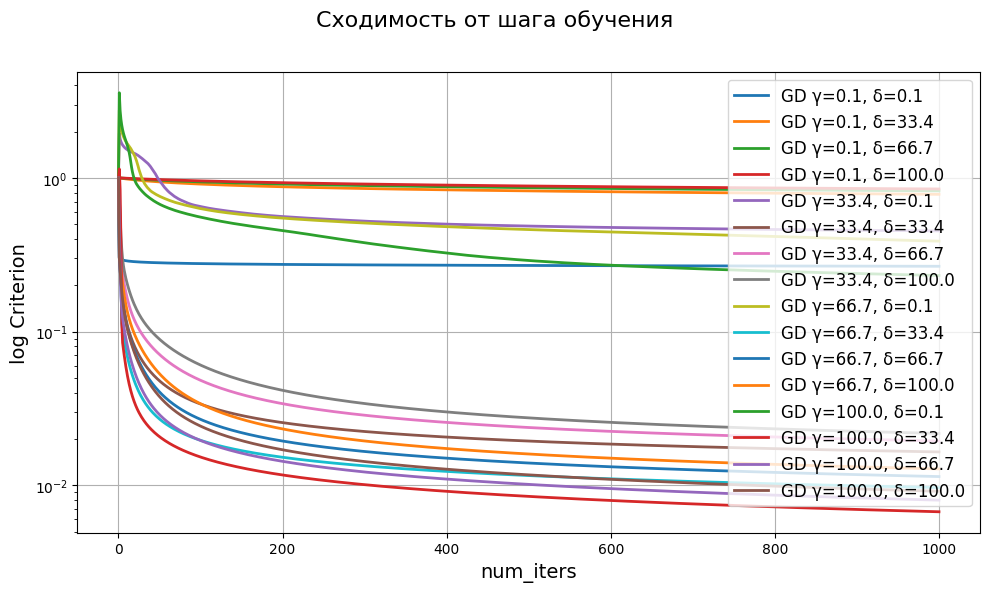

In [35]:
def dynamic_lr(initial_gamma, delta):
    # TODO: return a lambda function that depends on k
    lr_k = lambda k: initial_gamma / (k + delta)
    return lr_k

gamma_grid = np.linspace(0.1, 100, 4)
delta_grid = np.linspace(0.1, 100, 4)

res_list = []
for gamma in gamma_grid:
    for delta in delta_grid:
        lr_k = dynamic_lr(initial_gamma=gamma, delta=delta)
        optimizer = GradientDescent(lr=lr_k, name=f'GD γ={gamma:.1f}, δ={delta:.1f}')
        res = test_optimizer(optimizer)
        res_list.append(res)

plot_results(res_list, "Сходимость от шага обучения")

best_2 = min(res_list, key=lambda res: res['Criterion'][-1])

GD γ=33.4, δ=0.1:   0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\User\AppData\Local\Temp\ipykernel_15096\3433282958.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\User\AppData\Local\Temp\ipykernel_15096\3433282958.py:3: RuntimeWarning: overflow encountered in exp
  return np.exp(-y * (x @ w))
GD γ=100.0, δ=100.0: 100%|██████████| 1000/1000 [00:05<00:00, 167.37it/s, Loss=0.0841, Accuracy=0.996, Grad norm=0.00149]


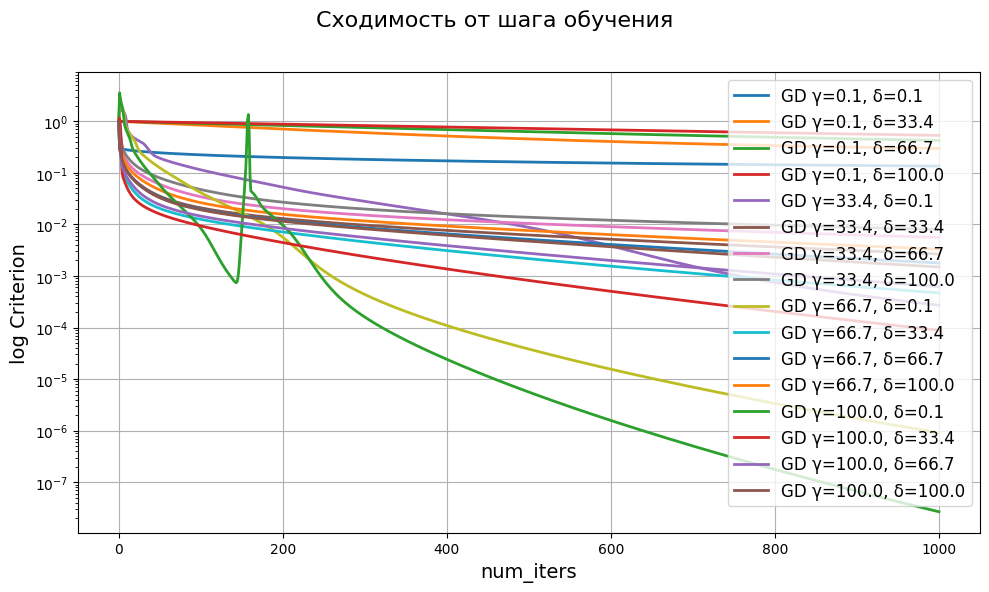

In [36]:
def dynamic_lr(initial_gamma, delta):
    # TODO: return a lambda function that depends on k
    lr_k = lambda k: initial_gamma / (k ** 0.5 + delta)
    return lr_k

gamma_grid = np.linspace(0.1, 100, 4)
delta_grid = np.linspace(0.1, 100, 4)

res_list = []
for gamma in gamma_grid:
    for delta in delta_grid:
        lr_k = dynamic_lr(initial_gamma=gamma, delta=delta)
        optimizer = GradientDescent(lr=lr_k, name=f'GD γ={gamma:.1f}, δ={delta:.1f}')
        res = test_optimizer(optimizer)
        res_list.append(res)

plot_results(res_list, "Сходимость от шага обучения")

best_3 = min(res_list, key=lambda res: res['Criterion'][-1])

In [38]:
# print(best_1, best_2, best_3)

plot_results([best_1, best_2, best_3, gd_res_baseline], title="Сравнение лучших шагов обучения")

In [39]:
best_final_gd_res = min([best_1, best_2, best_3, gd_res_baseline], key=lambda res: res['Criterion'][-1])
best_final_gd_res

{'name': 'GD γ=100.0, δ=0.1',
 'num_iters': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  1

### Задача 3 (1 балл)

Рассмотрим метод тяжёлого шарика (Heavy Ball)

$$ w^{k+1} = w^k - \gamma_k \nabla \mathcal{L}(w^k) + \tau_k (w^k - w^{k-1}) $$

- Реализуйте шаг метода тяжёлого шарика
- Используйте шаг $\gamma = \frac{1}{L}$.
1. Рассмотрите моментум  $\tau = \frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ и несколько моментумов в его окрестности: $s \cdot \tau$, где $s \in [0.9, 1.1]$. Рассмотрите не менее 3-х окрестностей.
2. Рассмотрите моментумы равные  $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ — номер итерации).
3. Сравните полученные результаты.

In [ ]:
class HeavyBall(ManualSolver):
    def __init__(self, lr, beta, init_w, name) -> None:
        super().__init__(lr, name, True, False)
        self.beta = beta if isinstance(beta, Callable) else lambda _: beta
        self.w_prev = init_w

    def step(self, w: np.ndarray, k: int, grad_f: np.ndarray, hess_f: None) -> np.ndarray:
        # TODO: implement heavy ball iteration step
        curr_lr = self.lr(k)
        curr_beta = self.beta(k)
        w_new = w - curr_lr * grad_f + curr_beta * (w - self.w_prev)
        self.w_prev = w.copy()
        return w_new

HB tau=1.033:  16%|█▌        | 162/1000 [00:00<00:03, 226.42it/s, Loss=215, Accuracy=0.699, Grad norm=0.877] C:\Users\User\AppData\Local\Temp\ipykernel_15096\3433282958.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
HB tau=1.033:  16%|█▌        | 162/1000 [00:00<00:03, 226.42it/s, Loss=264, Accuracy=0.702, Grad norm=0.957]C:\Users\User\AppData\Local\Temp\ipykernel_15096\3433282958.py:3: RuntimeWarning: overflow encountered in exp
  return np.exp(-y * (x @ w))
HB tau=1.033: 100%|██████████| 1000/1000 [00:05<00:00, 189.49it/s, Loss=inf, Accuracy=0.214, Grad norm=4.83e+5]


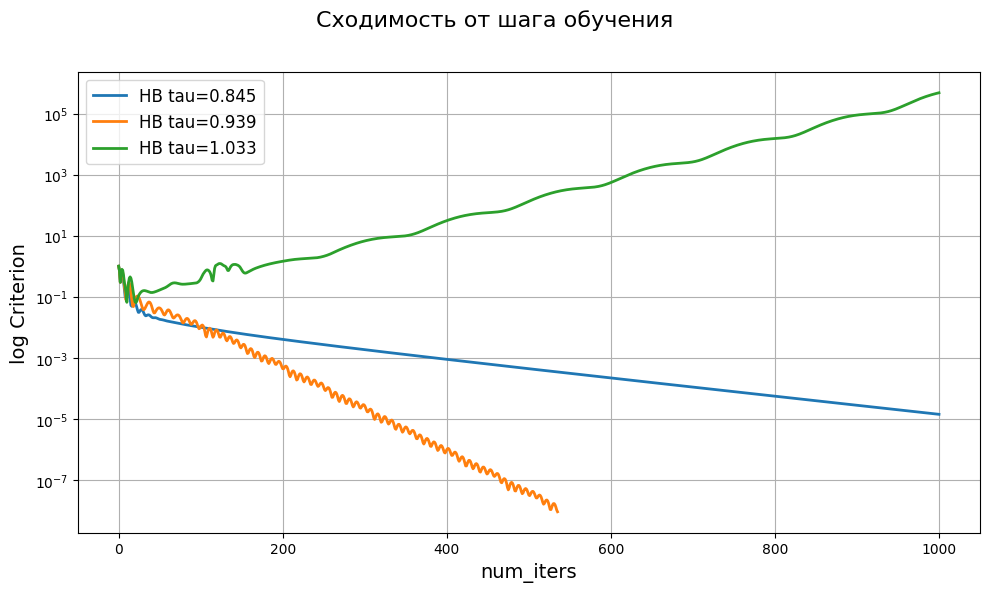

In [ ]:
L = get_lipschitz(train_mush_x)
s_grid = np.linspace(0.9, 1.1, 3)

res_list = []
for s in s_grid:
	gamma = 1 / L
	tau = (L ** 0.5 - lambda_mush ** 0.5) / (L ** 0.5 + lambda_mush ** 0.5)
	tau_k = tau * s
	optimizer = HeavyBall(lr=gamma, beta=tau_k, init_w=start_w_mush, name=f'HB tau={tau_k:.3f}')
	res = test_optimizer(optimizer)
	res_list.append(res)

plot_results(res_list, "Сходимость от шага обучения")

best_HB_1 = min(res_list, key=lambda res: res['Criterion'][-1])

HB s=3: 100%|██████████| 1000/1000 [00:07<00:00, 133.38it/s, Loss=0.0834, Accuracy=0.996, Grad norm=0.000123]


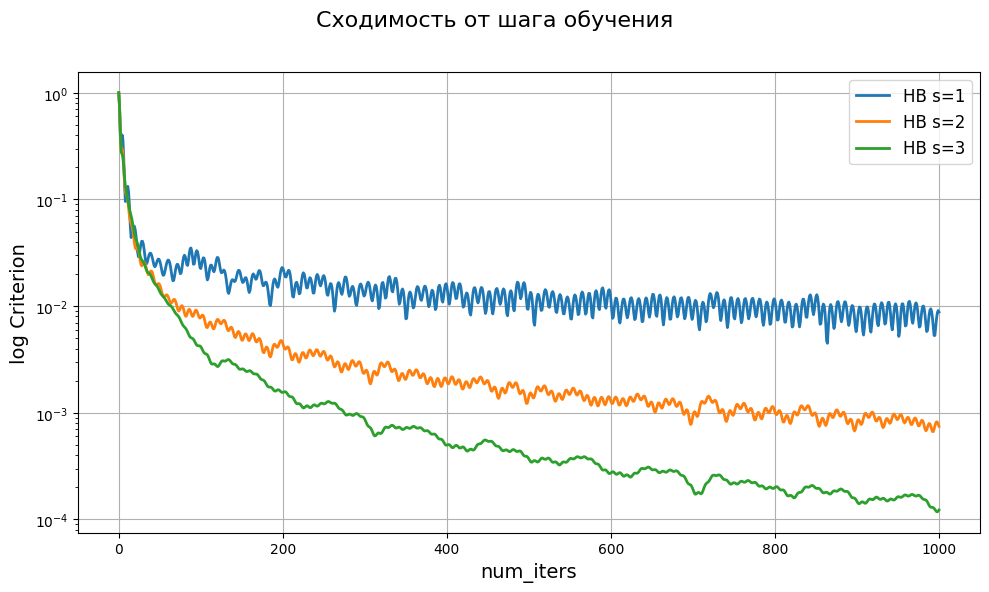

In [43]:
def beta_k_s(s):
    # TODO: return a lambda function that depends on k
    tau_k = lambda k: k / (k + s)
    return tau_k

L = get_lipschitz(train_mush_x)

res_list = []
for s in range(1, 4):
	gamma = 1 / L
	tau_k = beta_k_s(s)
	optimizer = HeavyBall(lr=gamma, beta=tau_k, init_w=start_w_mush, name=f'HB s={s}')
	res = test_optimizer(optimizer)
	res_list.append(res)

plot_results(res_list, "Сходимость от шага обучения")

best_HB_2 = min(res_list, key=lambda res: res['Criterion'][-1])

In [44]:
plot_results([best_HB_1, best_HB_2], title="Сравнение лучших шагов обучения")

In [46]:
best_final_hb_res = min([best_HB_1, best_HB_2], key=lambda res: res['Criterion'][-1])
best_final_hb_res

{'name': 'HB tau=0.939',
 'num_iters': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
 

### Задача 4 (2 балла)

Рассмотрим ускоренный градиентный метод (Nesterov Accelerated Gradient)

$$
\begin{align*}
& w_{k+1} = y_k - \gamma_k \nabla \mathcal{L}(y_k) \\
& y_{k+1} = w_{k+1} + \tau_k (w_{k+1} - w_k)
\end{align*}
$$

- Реализуйте шаг ускоренного градиентного метода
- Используйте шаг $\gamma = \frac{1}{L}$.
1. Рассмотрите моментум  $\tau = \frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ и несколько моментумов в его окрестности: $s \cdot \tau$, где $s \in [0.9, 1.1]$. Рассмотрите не менее 3-х окрестностей.
2. Рассмотрите моментумы равные  $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ — номер итерации).
3. Сравните полученные результаты.

In [50]:
class NAG(ManualSolver):
    def __init__(self, lr, beta, init_w, name) -> None:
        super().__init__(lr, name, True, False)
        self.beta = beta if isinstance(beta, Callable) else lambda _: beta
        self.w_prev = init_w
        self.y_prev = init_w

    def step(self, w: np.ndarray, k: int, grad_f: np.ndarray, hess_f: None) -> np.ndarray:
        # TODO: implement NAG iteration step
        y = w.copy()
        curr_lr = self.lr(k)
        curr_beta = self.beta(k)
        w_new = self.y_prev - curr_lr * grad_f
        y_new = w_new + curr_beta * (w_new - w)
        self.w_prev = w.copy()
        self.y_prev = y_new.copy()
        return w_new

In [51]:
L = get_lipschitz(train_mush_x)
s_grid = np.linspace(0.9, 1.1, 3)

res_list = []
for s in s_grid:
	gamma = 1 / L
	tau = (L ** 0.5 - lambda_mush ** 0.5) / (L ** 0.5 + lambda_mush ** 0.5)
	tau_k = tau * s
	optimizer = NAG(lr=gamma, beta=tau_k, init_w=start_w_mush, name=f'NAG tau={tau_k:.3f}')
	res = test_optimizer(optimizer)
	res_list.append(res)

plot_results(res_list, "Сходимость от шага обучения")

best_NAG_1 = min(res_list, key=lambda res: res['Criterion'][-1])

NAG tau=1.033:  18%|█▊        | 185/1000 [00:03<00:18, 45.12it/s, Loss=172, Accuracy=0.796, Grad norm=0.723]  C:\Users\User\AppData\Local\Temp\ipykernel_15096\3433282958.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
NAG tau=1.033:  23%|██▎       | 233/1000 [00:04<00:14, 54.59it/s, Loss=483, Accuracy=0.582, Grad norm=1.4]  C:\Users\User\AppData\Local\Temp\ipykernel_15096\3433282958.py:3: RuntimeWarning: overflow encountered in exp
  return np.exp(-y * (x @ w))
NAG tau=1.033: 100%|██████████| 1000/1000 [00:20<00:00, 49.93it/s, Loss=inf, Accuracy=0.541, Grad norm=1.8e+5]


NAG s=3: 100%|██████████| 1000/1000 [00:19<00:00, 51.43it/s, Loss=0.0834, Accuracy=0.996, Grad norm=4.64e-5]


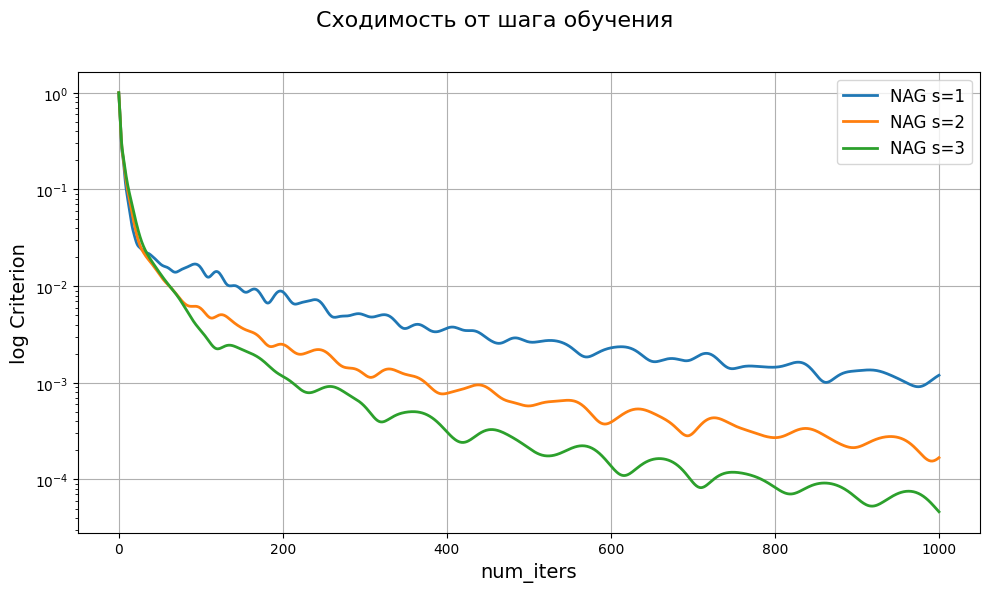

In [52]:
def beta_k_s(s):
    # TODO: return a lambda function that depends on k
    tau_k = lambda k: k / (k + s)
    return tau_k

L = get_lipschitz(train_mush_x)

res_list = []
for s in range(1, 4):
	gamma = 1 / L
	tau_k = beta_k_s(s)
	optimizer = NAG(lr=gamma, beta=tau_k, init_w=start_w_mush, name=f'NAG s={s}')
	res = test_optimizer(optimizer)
	res_list.append(res)

plot_results(res_list, "Сходимость от шага обучения")

best_NAG_2 = min(res_list, key=lambda res: res['Criterion'][-1])

In [53]:
plot_results([best_NAG_1, best_NAG_2], title="Сравнение лучших шагов обучения")

In [54]:
best_final_nag_res = min([best_NAG_1, best_NAG_2], key=lambda res: res['Criterion'][-1])
best_final_nag_res

{'name': 'NAG tau=0.939',
 'num_iters': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,


### Задача 5 (1 балла)

Рассмотрим один из самых известных методов второго порядка - Метод Ньютона (Newton's method):

$$
w_{k+1} = w_k - \nabla^2\mathcal{L}(w^k)^{-1} \nabla \mathcal{L}(w^k)
$$

А точнее, его модификацию - демпфированный метод Ньютона (Dumped Newton's method):

$$
w_{k+1} = w_k - \gamma_k \nabla^2\mathcal{L}(w^k)^{-1} \nabla \mathcal{L}(w^k)
$$

- Реализуйте шаг демпфированного метода Ньютона
1.  Протестируйте различные $\gamma_k = \gamma = \frac{s}{L}$, где $s \in [0.5, 1.5]$, $L$ - константа липшица в задаче. Рассмотрите не менее 3-х $s$.
2. Сравните полученные результаты.

In [55]:
class Newton(ManualSolver):
    def __init__(self, lr, name) -> None:
        super().__init__(lr, name, True, True)

    def step(self, w: np.ndarray, k: int, grad_f: np.ndarray, hess_f: np.ndarray) -> np.ndarray:
        # TODO: implement Newton iteration step
        curr_lr = self.lr(k)
        w_new = w - curr_lr * (np.linalg.inv(hess_f) @ grad_f)
        return w_new

Newton s=1.5:   0%|          | 5/1000 [00:04<14:20,  1.16it/s, Loss=99, Accuracy=0.516, Grad norm=1.32]   C:\Users\User\AppData\Local\Temp\ipykernel_15096\3433282958.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
Newton s=1.5:   1%|          | 6/1000 [00:05<14:38,  1.13it/s, Loss=294, Accuracy=0.481, Grad norm=1.63]C:\Users\User\AppData\Local\Temp\ipykernel_15096\3433282958.py:3: RuntimeWarning: overflow encountered in exp
  return np.exp(-y * (x @ w))
Newton s=1.5: 100%|██████████| 1000/1000 [11:26<00:00,  1.46it/s, Loss=inf, Accuracy=0.481, Grad norm=1.71]


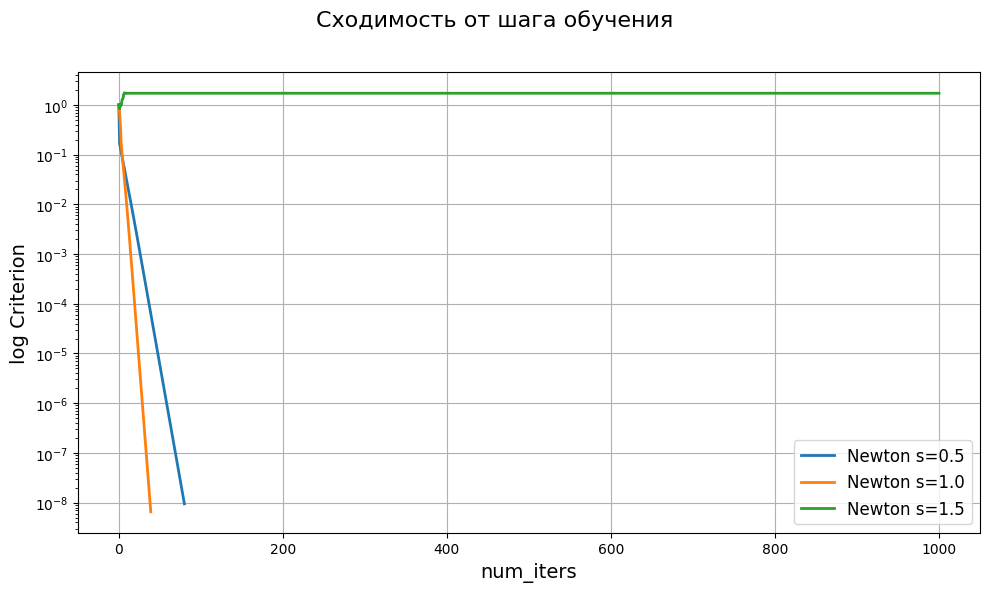

In [57]:
L = get_lipschitz(train_mush_x)
s_grid = np.linspace(0.5, 1.5, 3)

res_list = []
for s in s_grid:
	gamma = s / L
	optimizer = Newton(lr=gamma, name=f'Newton s={s}')
	res = test_optimizer(optimizer)
	res_list.append(res)

plot_results(res_list, "Сходимость от шага обучения")

In [58]:
best_final_newton_res = min(res_list, key=lambda res: res['Criterion'][-1])
best_final_newton_res

{'name': 'Newton s=1.0',
 'num_iters': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 'Time': [0,
  0.34578967094421387,
  0.6831591129302979,
  1.0103569030761719,
  1.361494541168213,
  1.7831223011016846,
  2.097536563873291,
  2.407501459121704,
  2.8842334747314453,
  3.6642260551452637,
  4.587236404418945,
  5.455868244171143,
  6.316109657287598,
  7.182197093963623,
  8.123061656951904,
  9.620661973953247,
  10.811020374298096,
  12.163746118545532,
  13.11209750175476,
  14.055439949035645,
  14.967944622039795,
  15.859915494918823,
  16.76616096496582,
  17.69230580329895,
  18.614134550094604,
  20.119036436080933,
  21.689714670181274,
  22.853777170181274,
  23.841835975646973,
  24.790193557739258,
  25.685770511627197,
  26.54944920539856,
  27.39860248565674,
  28.529159545898438,
  29.

### Сравнение лучших реализаций

In [59]:
final_results = [best_final_gd_res, best_final_hb_res, best_final_nag_res, best_final_newton_res]
plot_results(final_results, 'Сравнение лучших реализаций методов', metrics_type=['Criterion'])

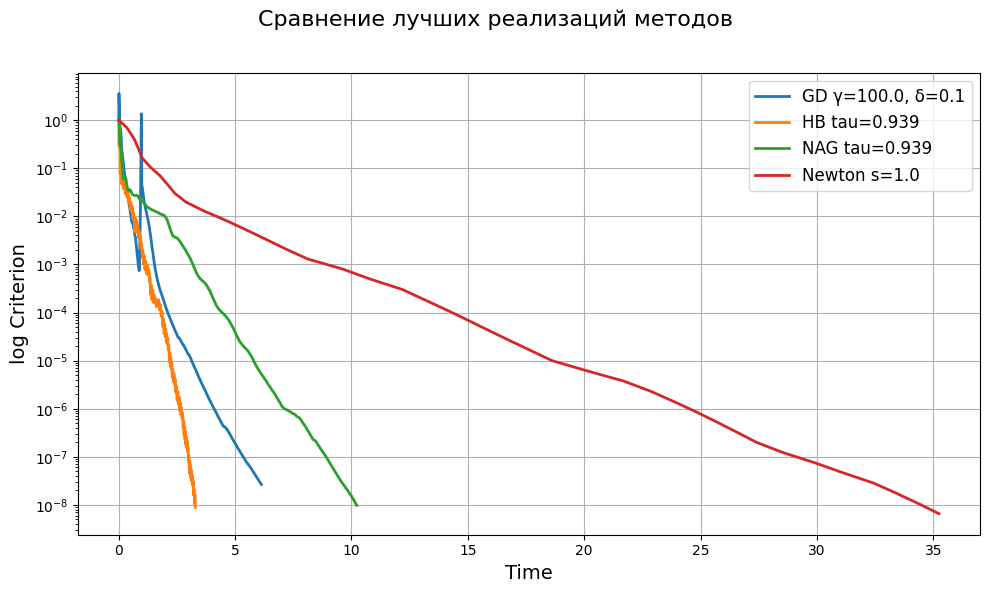

In [60]:
final_results = [best_final_gd_res, best_final_hb_res, best_final_nag_res, best_final_newton_res]
plot_results(final_results, 'Сравнение лучших реализаций методов', metrics_type=['Criterion'], x='Time')

### Ваши выводы (до 0.5 баллов):

1. Почему предложено выбирать $\gamma = \frac{s}{L}$, $\tau = \frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$?
2. Почему наблюдаются различия в графиках по количеству итераций и по времени?
3. Любые другие рассуждения приветствуются.

### Задача 6* (1 балл)

Метод проксимального градиентного спуска используется для оптмизации композитной функции потерь
$$
h(w) = f(w) + g(w),
$$
где $f(w)$ является выпуклой дифференцируемой функцией на своей области определения. Особенностью является то, что $g(w)$ не обязательно должна быть дифференцируема всюду на своём множестве определения.  

Мы решаем задачу вида
$$
\min_{w\in \mathbb{R}^d}\{f(w) + R(w)\},
$$
где $R(w)$ - выпуклый (возможно негладкий) регуляризатор.

Обновление параметров осуществляется по схеме
$$
w_{k+1} = prox_{\gamma R}(w_k - \gamma\nabla f(w)),
$$
где проксимальный оператор определяется как
$$
prox_{\gamma R}(v) = \arg\min_{w\in \mathbb{R}^d}\left\{\dfrac{1}{2\gamma}\|w - v\|^2 + R(w) \right\}.
$$

* Реализуйте шаг проксимального градиентного спуска для различных видов $R(w)$ (L1, L2-регуляризация).
1. Протестируйте различные $\gamma_k = \gamma = \frac{s}{L}$, где $L$ определяется согласно $R(w)$.
2. Сравните полученные результаты.

In [ ]:
1.
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

In [ ]:
2.
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

## Задание 3: Предсказание погоды в Австралии

Датасет содержит ежедневные наблюдения погоды в различных регионах Австралии за период в 10 лет.

Предсказываемым признаком является `RainTomorrow`: "Будет ли завтра дождь?". Это задача бинарной классификации.

Скачиваем датасет

In [51]:
import pandas as pd
import seaborn as sns

In [52]:
url = 'https://huggingface.co/Anm5/rainpred/resolve/main/weatherAUS.csv'
filename = 'weatherAUS.csv'

response = requests.get(url)
with open(filename, 'wb') as file:
    file.write(response.content)
df = pd.read_csv(filename)
df.head(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

### Задача 1 (3 балла): Анализ датасета

Датасет представляет собой табличные данные. В этом задании вы убедитесь, что основной объём работы в классификации таких данных с помощью методов машинного состоит в анализе датасета и его признаков.

Давайте выведем общую информацию о признаках в датасете

In [53]:
df.info()
print(f"Number of NaN targets: {df['RainTomorrow'].isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Можно заметить, что для некоторых примеров в датасете отсутствует разметка. Поскольку мы решаем задачу классификации с учителем, эти примеры нас не интересуют.

**Удалите из датасета сэмплы с отсутствующим значением `RainTomorrow`**.

In [54]:
df = df.dropna(subset=['RainTomorrow'])
df['RainTomorrow'].isnull().sum()
# Output: `df` variable.

np.int64(0)

Выделим категориальные переменные

In [55]:
test_list = [df[var].dtype for var in df.columns]
test_list

[dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O')]

In [56]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [57]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('The categorical variables are :', categorical)
for feature in categorical:
    print(f"Number of unique {feature}:", df[feature].nunique())

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Number of unique Date: 3436
Number of unique Location: 49
Number of unique WindGustDir: 16
Number of unique WindDir9am: 16
Number of unique WindDir3pm: 16
Number of unique RainToday: 2
Number of unique RainTomorrow: 2


`RainTomorrow` является целевым признаком. `RainToday` нетрудно бинаризовать. Остальные признаки содержат большое количество значений.

В первом приближении, удалим признаки кроме `RainTomorrow`, `RainToday`.

**Важно:** датасет без категориальных признаков необходимо записать в отдельную переменную `df_numerical`. Исходный набор `df` пригодится в дополнительном задании.

**Бинаризуйте признаки `RainTomorrow`, `RainToday`. Остальные удалите**

In [58]:
df_numerical = df.drop(columns=categorical)
# Output: `df_numerical` variable.

df_first = df[['RainToday', 'RainTomorrow']]
df_first['RainToday'] = df_first['RainToday'].replace('No', 0)
df_first['RainToday'] = df_first['RainToday'].replace('Yes', 1)
df_first['RainTomorrow'] = df_first['RainTomorrow'].replace('No', 0)
df_first['RainTomorrow'] = df_first['RainTomorrow'].replace('Yes', 1)
df_first

C:\Users\User\AppData\Local\Temp\ipykernel_13232\2432384511.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first['RainToday'] = df_first['RainToday'].replace('No', 0)
C:\Users\User\AppData\Local\Temp\ipykernel_13232\2432384511.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_first['RainToday'] = df_first['RainToday'].replace('Yes', 1)
C:\Users\User\AppData\Local\Temp\ipykernel_13232\2432384511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

RainToday  RainTomorrow
0             0.0             0
1             0.0             0
2             0.0             0
3             0.0             0
4             0.0             0
...           ...           ...
145454        0.0             0
145455        0.0             0
145456        0.0             0
145457        0.0             0
145458        0.0             0

[142193 rows x 2 columns]

Перейдём к численным признакам

In [59]:
numerical = [var for var in df.columns if df[var].dtype!='O']
round(df_numerical[numerical].describe(), 2)

MinTemp    MaxTemp   Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.00  141871.00  140787.00     81350.00  74377.00      132923.00   
mean       12.19      23.23       2.35         5.47      7.62          39.98   
std         6.40       7.12       8.47         4.19      3.78          13.59   
min        -8.50      -4.80       0.00         0.00      0.00           6.00   
25%         7.60      17.90       0.00         2.60      4.90          31.00   
50%        12.00      22.60       0.00         4.80      8.50          39.00   
75%        16.80      28.20       0.80         7.40     10.60          48.00   
max        33.90      48.10     371.00       145.00     14.50         135.00   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count     140845.00     139563.00    140419.00    138583.00    128179.00   
mean          14.00         18.64        68.84        51.48      1017.65   
std            8.89          8.80        19.05        20.80         7.11   
min            0.00          0.00         0.00         0.00       980.50   
25%            7.00         13.00        57.00        37.00      1012.90   
50%           13.00         19.00        70.00        52.00      1017.60   
75%           19.00         24.00        83.00        66.00      1022.40   
max          130.00         87.00       100.00       100.00      1041.00   

       Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm  
count    128212.00  88536.00  85099.00  141289.00  139467.00  
mean       1015.26      4.44      4.50      16.99      21.69  
std           7.04      2.89      2.72       6.49       6.94  
min         977.10      0.00      0.00      -7.20      -5.40  
25%        1010.40      1.00      2.00      12.30      16.60  
50%        1015.20      5.00      5.00      16.70      21.10  
75%        1020.00      7.00      7.00      21.60      26.40  
max        1039.60      9.00      9.00      40.20      46.70

Одним из важных аспектов обработки численных признаков является *опеределние выбросов (англ. outliers)*. С одной стороны, выбросы можно выделить для всех признаков. Однако, бывает полезно изучить, для каких фичей они более характерны. Это позволит избежать потери важной информации.

**Вам необходимо определить, для каких из численных признаков имеет смысл выделять выбросы.**

**Примечание:** Это можно сделать с помощью графика гистограммы. Отрисуйте зависимости всех числовых признаков от целевого `RainTomorrow`. По оси x отложите значения признака, по оси y - плотность `RainTomorrow` (в результате на рисунке будут 2 графика для каждого из бинарных значений). Для этого воспользуйтесь функцией `seaborn.histplot` с аргументом `stat='density'`. По виду графика можно интерпретировать, для каких признаков существуют значительные выбросы.

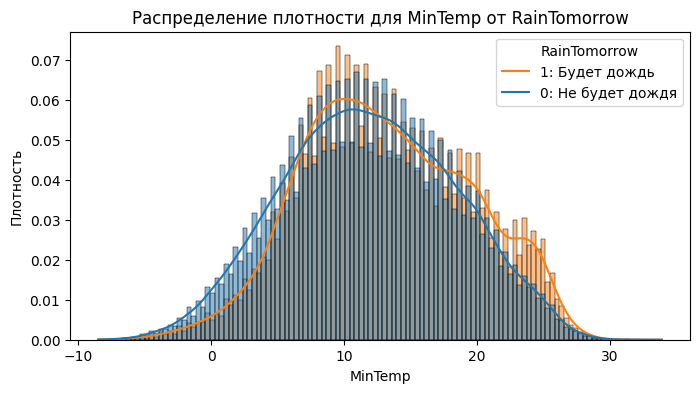

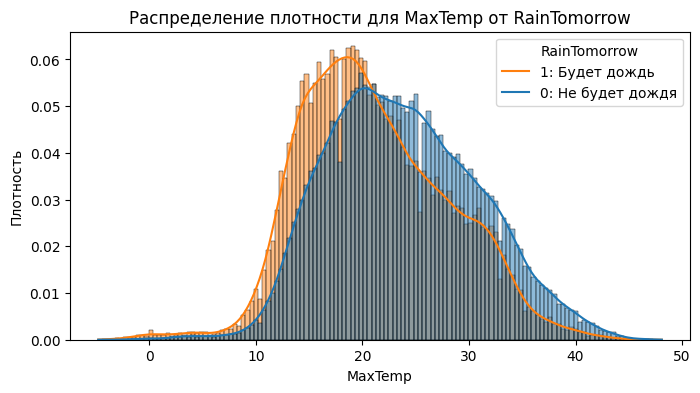

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


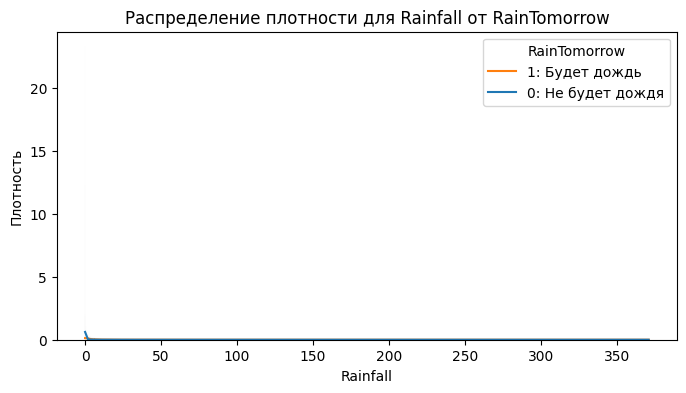

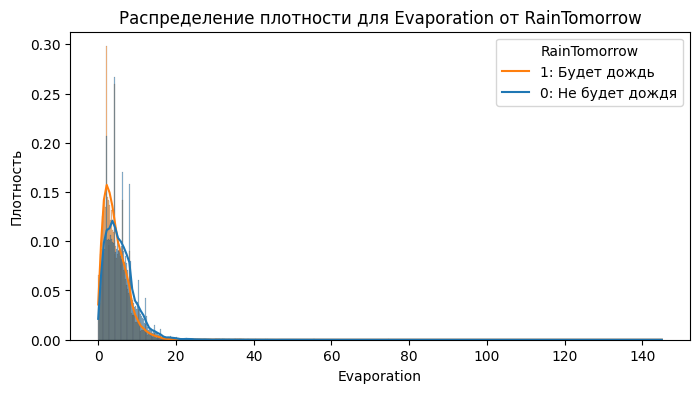

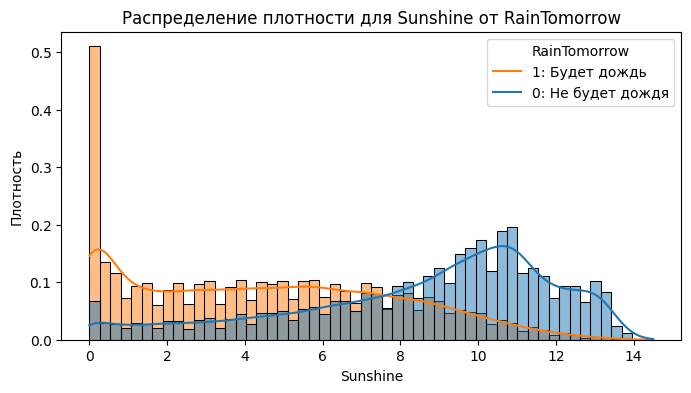

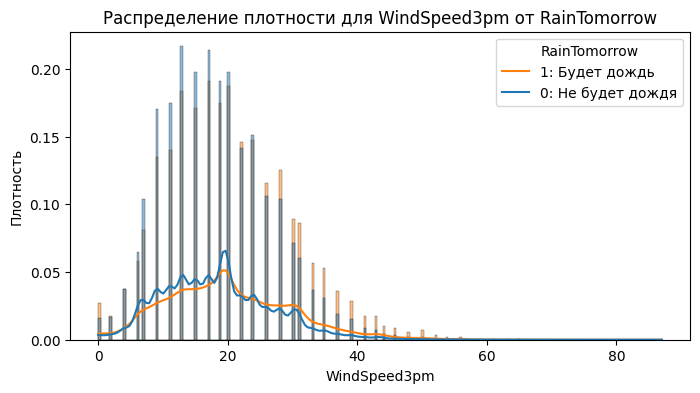

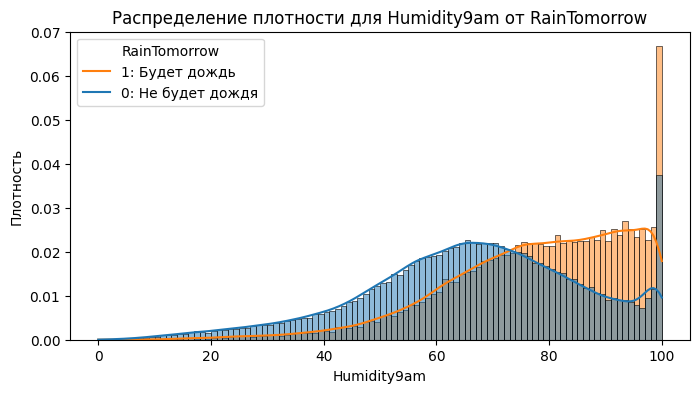

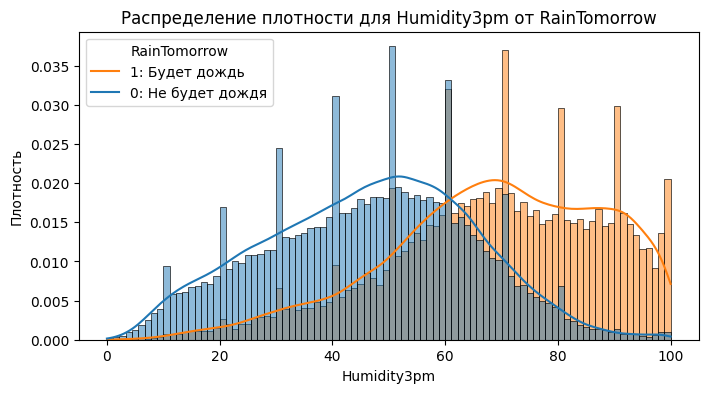

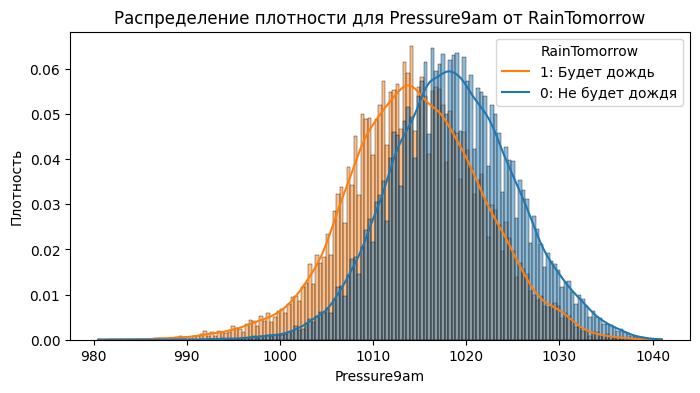

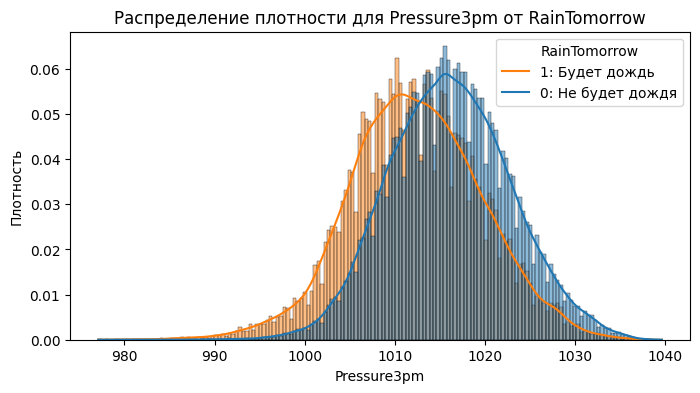

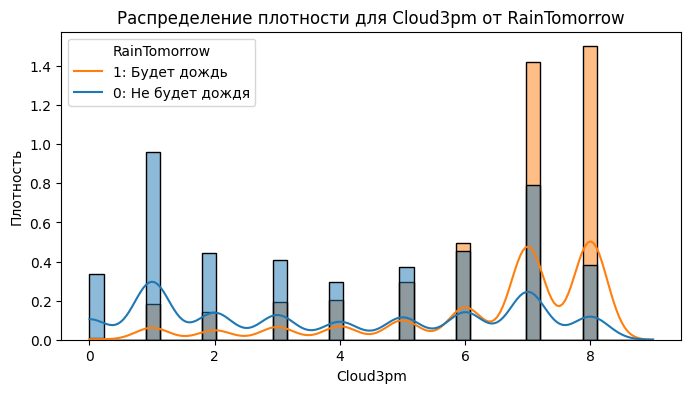

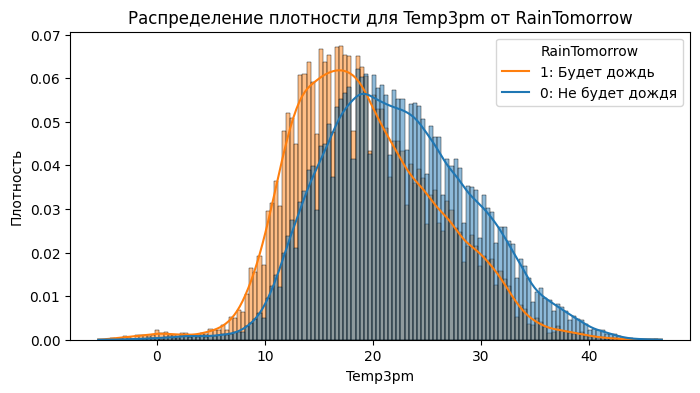

In [60]:
for feature in numerical:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue='RainTomorrow', stat='density', common_norm=False, kde=True)

    plt.title(f'Распределение плотности для {feature} от RainTomorrow')
    plt.xlabel(f'{feature}')
    plt.ylabel('Плотность')
    plt.legend(title='RainTomorrow', labels=['1: Будет дождь', '0: Не будет дождя'])
    plt.show()

Графики признаков с выбросами имеют характерное *смещение (англ. skew)*. Для смещённых распределений, выбросы можно определить через *межквартильное расстояние (англ. Interquartile Range).*
$$
IQR = Q3 - Q1,
$$
где $Q3$ - третий квартиль, соответствующий порогу $75\%$, $Q1$ - первый квартиль, соответствующий порогу $25\%$.

Тогда выбросы определяют согласно правилу:
*  *Нижний выброс* - $x < Q1 - 1.5\cdot IQR$, $x$ - значение признака;
*  *Верхний выброс* - $x > Q3 + 1.5\cdot IQR$.

Если в результате получилось слишком много выбросов, значение $1.5$ можно увеличить, выделяя более "явные".

**Для полученных числовых признаков выделите соответствующие выбросы с помощью $IQR$ с коэффициентом 2**.

In [61]:
# print(numerical)
outliers = pd.DataFrame(None, index=df_numerical.index, columns=df_numerical.columns)
for feature in numerical:
    Q1 = df_numerical[feature].quantile(0.25)
    Q3 = df_numerical[feature].quantile(0.75)
    IQR = Q3 - Q1

    outliers_filter = (df_numerical[feature] < Q1 - 2 * IQR) | ((df_numerical[feature] > Q3 + 2 * IQR))
    outliers[feature] = outliers_filter

    # outliers_dict[feature] = outliers

outliers
# Output: `outliers` variable.

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0         False    False     False        False     False          False   
1         False    False     False        False     False          False   
2         False    False     False        False     False          False   
3         False    False     False        False     False          False   
4         False    False     False        False     False          False   
...         ...      ...       ...          ...       ...            ...   
145454    False    False     False        False     False          False   
145455    False    False     False        False     False          False   
145456    False    False     False        False     False          False   
145457    False    False     False        False     False          False   
145458    False    False     False        False     False          False   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0              False         False        False        False        False   
1              False         False        False        False        False   
2              False         False        False        False        False   
3              False         False        False        False        False   
4              False         False        False        False        False   
...              ...           ...          ...          ...          ...   
145454         False         False        False        False        False   
145455         False         False        False        False        False   
145456         False         False        False        False        False   
145457         False         False        False        False        False   
145458         False         False        False        False        False   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0             False     False     False    False    False  
1             False     False     False    False    False  
2             False     False     False    False    False  
3             False     False     False    False    False  
4             False     False     False    False    False  
...             ...       ...       ...      ...      ...  
145454        False     False     False    False    False  
145455        False     False     False    False    False  
145456        False     False     False    False    False  
145457        False     False     False    False    False  
145458        False     False     False    False    False  

[142193 rows x 16 columns]

Есть 2 стратегии работы с выбросами:
*   Удалить соответствующий сэмпл;
*   Заменить его на среднее/медиану.

В первом приближении, удалим соответствующие примеры.

In [62]:
df_num_no_outliers_with_index = df_numerical[~outliers.any(axis=1)]
y_series = df_first['RainTomorrow']
df_num_no_outliers = df_num_no_outliers_with_index.join(y_series)
df_num_no_outliers.reset_index(drop=True, inplace=True)

Базовый анализ датасета почти закончен! Осталось пара шагов.

Выделим целевой признак в соответствующую переменную. Посмотрим на пропуски в обучающей выборке.

In [63]:
X = df_num_no_outliers.drop(['RainTomorrow'], axis=1)
y = df_num_no_outliers['RainTomorrow']
X.isnull().sum()

MinTemp            550
MaxTemp            271
Rainfall          1367
Evaporation      49971
Sunshine         55727
WindGustSpeed     7347
WindSpeed9am      1150
WindSpeed3pm      2108
Humidity9am       1398
Humidity3pm       2857
Pressure9am      11616
Pressure3pm      11581
Cloud9am         45169
Cloud3pm         48005
Temp9am            721
Temp3pm           2157
dtype: int64

Пропуски необходимо заполнить. Обычно это делают с помощью среднего/медианы. Мы воспользуемся медианой, так как она более устойчива к выбросам.

**Заполните пропуски в обучающей выборке медианой.**

In [64]:
for col in X.columns:
  median = X[col].median()
  X.fillna(median, inplace=True)

print(X.isnull().sum())

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64


Наконец, осталось провести нормализацию значений.

Разделим выборку на обучающую и тестовую, чтобы не учитывать масштаб на тесте.

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  93141.000000  93141.000000  93141.000000  93141.000000  93141.000000   
mean      11.938048     23.725808      0.322906      8.185333      9.883698   
std        6.442571      7.045997      1.328562      4.020566      3.201015   
min       -8.500000     -2.700000      0.000000      0.000000      0.000000   
25%        7.300000     18.500000      0.000000      4.400000      8.900000   
50%       11.800000     23.300000      0.000000      9.500000     11.800000   
75%       16.600000     28.700000      0.000000     11.800000     11.800000   
max       33.900000     47.000000     11.800000     17.000000     14.500000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   93141.000000  93141.000000  93141.000000  93141.000000  93141.000000   
mean       36.835430     13.333121     18.013919     65.844365     47.656463   
std        13.470631      8.253361      8.251609     19.545295     20.387733   
min         6.000000      0.000000      0.000000      5.000000      0.000000   
25%        28.000000      7.000000     11.800000     55.000000     33.000000   
50%        37.000000     13.000000     17.000000     67.000000     48.000000   
75%        44.000000     19.000000     24.000000     79.000000     62.000000   
max        81.000000     43.000000     46.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  93141.000000  93141.000000  93141.000000  93141.000000  93141.000000   
mean     918.208821    916.112261      7.084004      7.330078     17.089449   
std      301.446063    300.281388      4.388643      4.293075      6.522397   
min       11.800000     11.800000      0.000000      0.000000     -5.300000   
25%     1012.000000   1009.200000      3.000000      3.000000     12.300000   
50%     1017.400000   1014.700000      7.000000      7.000000     16.900000   
75%     1022.300000   1019.800000     11.800000     11.800000     21.700000   
max     1041.000000   1038.900000     11.800000     11.800000     40.200000   

            Temp3pm  
count  93141.000000  
mean      22.033717  
std        6.918798  
min       -2.900000  
25%       17.000000  
50%       21.600000  
75%       26.800000  
max       45.900000

Для нормализации будем использовать `MinMaxScaler` модуля `sklearn.preprocessing`.

**Вам необходимо "обучить" (`fit`) scaler на `X_train` и использовать его на `X_test` (`transform`).**

**Примечание:** выходом `MinMaxScaler` является `np.array`. Чтобы в дальнейшем работать с выборкой, после масштабирования необходимо обратно перевести её в `pd.DataFrame`.

In [70]:
from sklearn.preprocessing import MinMaxScaler

train_columns = X_train.columns
test_columns = X_test.columns

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=train_columns)
X_test = pd.DataFrame(X_test, columns=test_columns)
# Output: `X_train`, `X_test`: pd.DataFrame type.

### Задача 2 (5 баллов): Классификация



* Вам необходимо обучить обработанный датасет с помощью логистической регрессии.
* Вы можете пользоваться библиотекой `sklearn`
* Проведите классификацию с L1 и L2-регуляризацией. Какие признаки регуляризация lasso посчитала неинформативными?
* Проведите классификацию с регуляризацией [elasticnet](https://en.wikipedia.org/wiki/Elastic_net_regularization). Для этого воспользуйтесь поиском по сетке гиперпараметров (`GridSearchCV` модуля `sklearn.model_selection`). Пространство поиска определите константой `C = [1, 2, 5, 10, 100]` и значением `l1_ratio = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]`.
* Сделайте выводы по полученым результатам




In [ ]:
from sklearn.linear_model import LogisticRegression

l1_model = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42)
l1_model.fit(X_train, y_train)

y_l1 = l1_model.predict(X_test)

l2_model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', random_state=42)
l2_model.fit(X_train, y_train)

y_l2 = l2_model.predict(X_test)



[[ 0.79170072  3.6292017   1.98093374  0.39578972 -1.80021351  3.47940344
  -0.5535769  -1.10970329  0.39055019  4.43582034  0.64334418 -0.9821948
  -0.21235096  0.54811458  0.92757281 -4.31593771]]


In [83]:
# print(l1_model.coef_[0])
coeffs = pd.DataFrame(l1_model.coef_[0], index=X_train.columns, columns=['w'])
# print(coeffs)
zero_features = coeffs[coeffs['w'] == 0]
zero_features

Empty DataFrame
Columns: [w]
Index: []

In [84]:
from sklearn.model_selection import GridSearchCV

grid = {
    'C': [1, 2, 5, 10, 100],
    'l1_ratio': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

elasticnet_model = LogisticRegression(penalty='elasticnet', solver='saga', random_state=42)

grid_serch = GridSearchCV(estimator=elasticnet_model, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_serch.fit(X_train, y_train)

best_elasticnet_model = grid_serch.best_estimator_

y_elasticnet_model = best_elasticnet_model.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_l1))
print(accuracy_score(y_test, y_l2))
print(accuracy_score(y_test, y_elasticnet_model))

0.8614188782959719
0.8611612127458559
0.8613329897792665


### Задача 3* (2 балла): Категориальные признаки

* В ходе анализа датасета было сделано несколько упрощений:
    * Категориальные признаки были опущены (`df --> df_numerical`);
    * Выбросы были опущены (`df_numerical --> df_num_no_outliers`).
* Необходимо провести обработку категориальных признаков.
* Протестировать качество логистической регрессии и подобрать гиперпараметры на различных вариантах:
    * С категориальными признаками и без учета выбросов;
    * Без категориальных признаков, с учетом выбросов;
    * С категориальными признаками, с учетом выбросов.
* Поощеряется изобретательность. Возможно, какие-то категориальные/численные признаки покажутся менее инфомативными.


* P.S. Не расстраивайтесь, если выдвигаемые гипотезы не дадут прибавки в качестве. Важен сам пайплайн проверки выдвигаемых гипотез)

In [68]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################